Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
drive.mount('/content/drive')

file_path1 = '/content/drive/My Drive/HR.csv'

hr_df = pd.read_csv(file_path1)

Mounted at /content/drive


Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [2]:
# Расчет основных статистик для числовых переменных
statistics = hr_df.describe(include=[pd.np.number])
statistics.loc['mode'] = hr_df.mode().iloc[0]  # Добавление моды к статистике

<ipython-input-2-57d4f25e2aa5>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  statistics = hr_df.describe(include=[pd.np.number])


In [3]:
statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.

<ipython-input-4-7fda76c958c4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hr_df.corr()


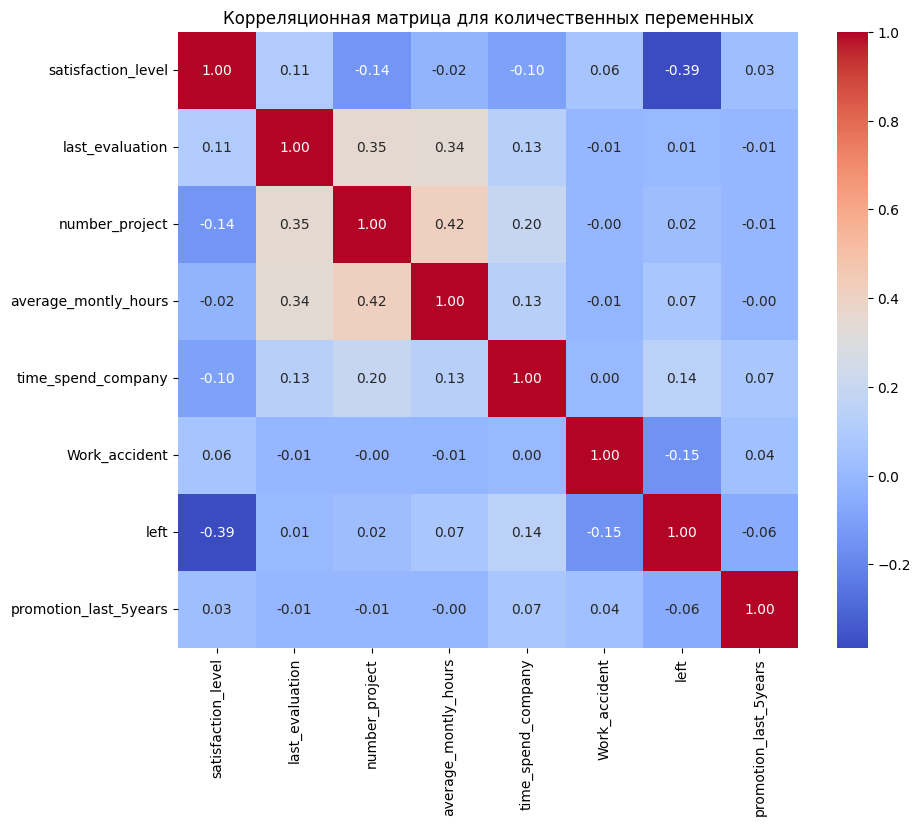

(number_project        average_montly_hours    0.417211
 average_montly_hours  number_project          0.417211
 dtype: float64,
 satisfaction_level  left                 -0.388375
 left                satisfaction_level   -0.388375
 dtype: float64,
 Work_accident       time_spend_company    0.00212
 time_spend_company  Work_accident         0.00212
 dtype: float64)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисление корреляционной матрицы
corr_matrix = hr_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица для количественных переменных")
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
# Копирование корреляционной матрицы и удаление корреляции переменной с самой собой (1.0)
corr_matrix_no_identity = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_identity.values, np.nan)

# Сортировка значений корреляции
sorted_corr = corr_matrix_no_identity.unstack().sort_values(kind="quicksort", na_position='first')

# Две самые скоррелированные переменные
most_correlated = sorted_corr.dropna().tail(2)

# Две переменные с минимальным абсолютным значением корреляции
least_correlated = sorted_corr.dropna().head(2)


closest_to_zero_corr = sorted_corr.dropna().sub(0).abs().nsmallest(2)

most_correlated, least_correlated, closest_to_zero_corr

Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [5]:
most_negatively_correlated = sorted_corr.dropna().nsmallest(2)

print("Две переменные с наибольшей по модулю отрицательной корреляцией:")
print(most_negatively_correlated)
print("\nДве самые скоррелированные переменные:")
print(most_correlated)
print("\nДве переменные с корреляцией, ближайшей к нулю:")
print(closest_to_zero_corr)



Две переменные с наибольшей по модулю отрицательной корреляцией:
satisfaction_level  left                 -0.388375
left                satisfaction_level   -0.388375
dtype: float64

Две самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Две переменные с корреляцией, ближайшей к нулю:
Work_accident       time_spend_company    0.00212
time_spend_company  Work_accident         0.00212
dtype: float64


Две переменные с наибольшей по модулю отрицательной корреляцией:

Уровень удовлетворенности работой (satisfaction_level) и Увольнение сотрудника (left) с корреляцией -0.388375.
Две самые скоррелированные переменные:

Количество проектов (number_project) и Среднее количество часов на рабочем месте в месяц (average_montly_hours) с корреляцией 0.417211.
Две переменные с корреляцией, ближайшей к нулю:

Происходили ли несчастные случаи на рабочем месте с сотрудником (Work_accident) и Стаж работы в компании в годах (time_spend_company) с корреляцией 0.00212.

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [6]:
#Рассчитайте сколько сотрудников работает в каждом департаменте.

department_counts = hr_df['department'].value_counts()
department_counts

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Показать распределение сотрудников по зарплатам.

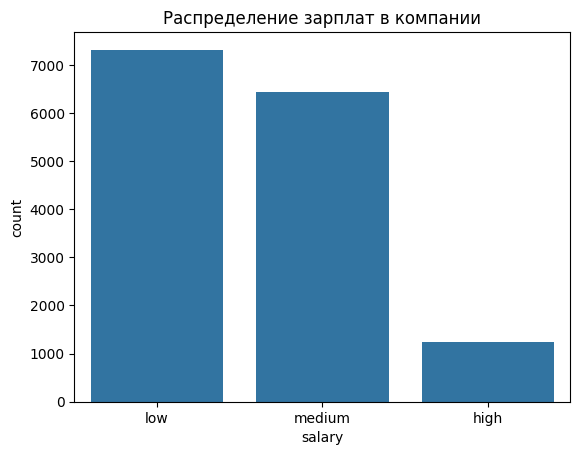

In [8]:
# Показать распределение сотрудников по зарплатам.


# Построение столбчатой диаграммы для колонки зарплат
sns.countplot(x=hr_df['salary'])

# Название и отображение диаграммы
plt.title("Распределение зарплат в компании")
plt.show()

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

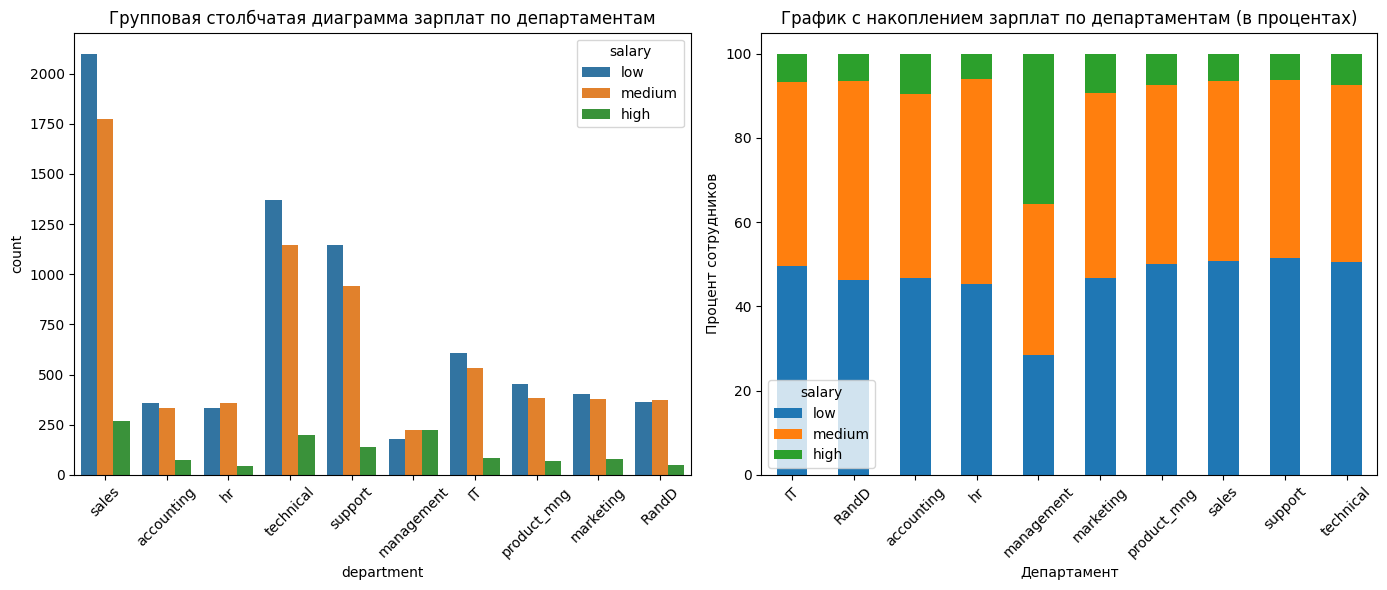

In [10]:

plt.figure(figsize=(14, 6))

# Групповая столбчатая диаграмма
plt.subplot(1, 2, 1)
sns.countplot(x='department', hue='salary', data=hr_df)
plt.title("Групповая столбчатая диаграмма зарплат по департаментам")
plt.xticks(rotation=45)

# График с накоплением в процентах
plt.subplot(1, 2, 2)
# Расчет процентного распределения зарплат по департаментам
percent_distribution = hr_df.groupby('department')['salary'].value_counts(normalize=True).unstack().loc[:, salary_order] * 100
percent_distribution.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("График с накоплением зарплат по департаментам (в процентах)")
plt.xlabel("Департамент")
plt.ylabel("Процент сотрудников")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

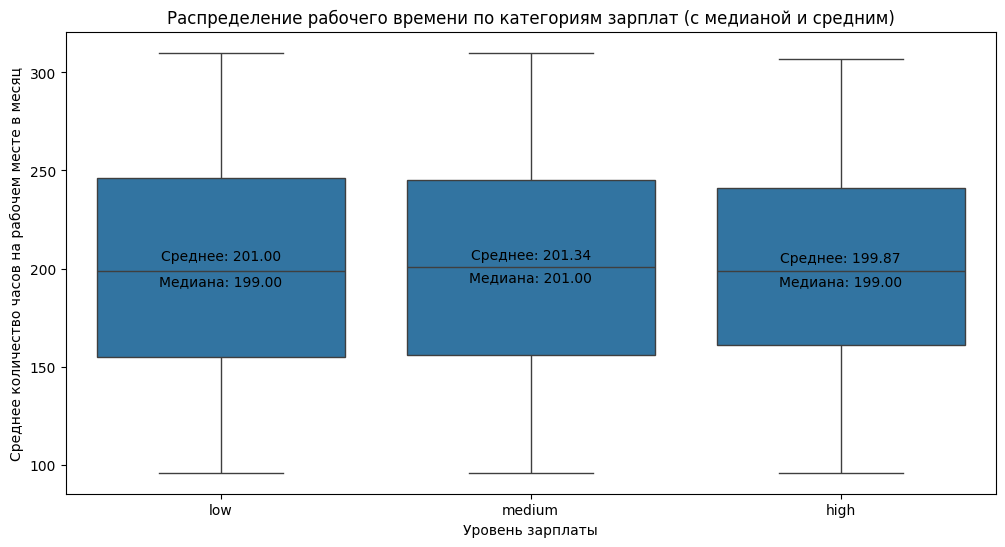

In [17]:
#

plt.figure(figsize=(12, 6))

# График распределения рабочего времени с медианой и средним
boxplot = sns.boxplot(x='salary', y='average_montly_hours', data=hr_df, order=["low", "medium", "high"])
plt.title("Распределение рабочего времени по категориям зарплат (с медианой и средним)")

# Расчет средних и медианных значений и добавление их на график
mean_values = hr_df.groupby('salary')['average_montly_hours'].mean().reindex(["low", "medium", "high"])
median_values = hr_df.groupby('salary')['average_montly_hours'].median().reindex(["low", "medium", "high"])

for index, (mean, median) in enumerate(zip(mean_values, median_values)):
    plt.text(index, mean + 2, f'Среднее: {mean:.2f}', color='black', ha="center", va="bottom", fontsize=10)
    plt.text(index, median - 2, f'Медиана: {median:.2f}', color='black', ha="center", va="top", fontsize=10)

plt.xlabel("Уровень зарплаты")
plt.ylabel("Среднее количество часов на рабочем месте в месяц")
plt.show()





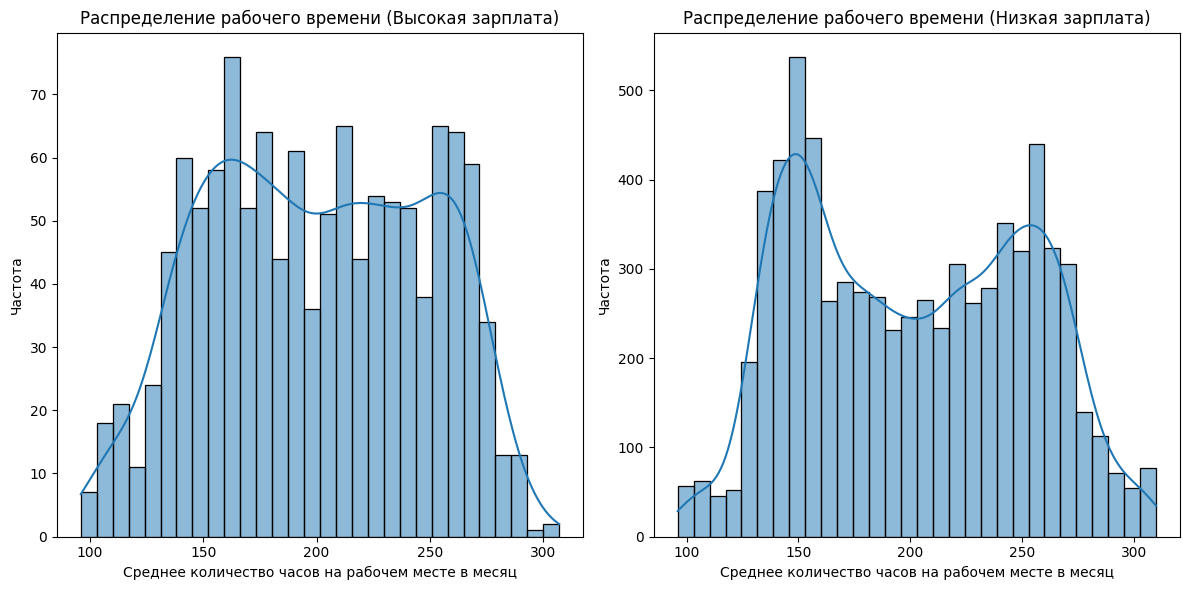

In [19]:
# Посмотрим на графики распределения количества часов сотрудников с высокой и низкой зарплатой

from scipy import stats

# Выборка среднего количества часов для сотрудников с высокой и низкой зарплатой
hours_high = hr_df[hr_df['salary'] == 'high']['average_montly_hours']
hours_low = hr_df[hr_df['salary'] == 'low']['average_montly_hours']

# Построение графиков для визуализации распределения рабочего времени в группах с высокой и низкой зарплатой

plt.figure(figsize=(12, 6))

# Распределение для сотрудников с высокой зарплатой
plt.subplot(1, 2, 1)
sns.histplot(hours_high, kde=True, bins=30)
plt.title("Распределение рабочего времени (Высокая зарплата)")
plt.xlabel("Среднее количество часов на рабочем месте в месяц")
plt.ylabel("Частота")

# Распределение для сотрудников с низкой зарплатой
plt.subplot(1, 2, 2)
sns.histplot(hours_low, kde=True, bins=30)
plt.title("Распределение рабочего времени (Низкая зарплата)")
plt.xlabel("Среднее количество часов на рабочем месте в месяц")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()



Кажется, есть два пика в обоих случаях - обычная ставка и полуторная ставка

In [21]:
# Оценка нормальности распределения с помощью теста Шапиро-Уилка
normality_test_high = stats.shapiro(hours_high)
normality_test_low = stats.shapiro(hours_low)

# Вывод результатов теста с описанием
print("Тест Шапиро-Уилка на нормальность распределения:")
print(f"Для сотрудников с высокой зарплатой: статистика = {normality_test_high[0]}, p-значение = {normality_test_high[1]}")
print(f"Для сотрудников с низкой зарплатой: статистика = {normality_test_low[0]}, p-значение = {normality_test_low[1]}")

# Интерпретация результатов
interpretation_high = "распределение нормальное" if normality_test_high[1] > 0.05 else "распределение не нормальное"
interpretation_low = "распределение нормальное" if normality_test_low[1] > 0.05 else "распределение не нормальное"

print("\nИнтерпретация результатов:")
print(f"Высокая зарплата: {interpretation_high}")
print(f"Низкая зарплата: {interpretation_low}")



Тест Шапиро-Уилка на нормальность распределения:
Для сотрудников с высокой зарплатой: статистика = 0.9712138175964355, p-значение = 5.604931784946058e-15
Для сотрудников с низкой зарплатой: статистика = 0.9598619937896729, p-значение = 7.01181725578852e-41

Интерпретация результатов:
Высокая зарплата: распределение не нормальное
Низкая зарплата: распределение не нормальное


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


т.к. распределение по количеству часов не нормальное используем непараметрический тест Манна-Уитни

In [23]:
# Вывод результатов теста Манна-Уитни

mann_whitney_test = stats.mannwhitneyu(hours_high, hours_low, alternative='two-sided')

print("Тест Манна-Уитни для сравнения среднего времени на работе:")
print(f"Статистика теста: {mann_whitney_test.statistic}")
print(f"P-значение: {mann_whitney_test.pvalue}")

# Интерпретация результатов
interpretation = "нет значимых различий" if mann_whitney_test.pvalue > 0.05 else "есть значимые различия"

print("\nИнтерпретация результатов:")
print(f"Между сотрудниками с высокой и низкой зарплатой {interpretation} в среднем времени, проведенном на работе.")



Тест Манна-Уитни для сравнения среднего времени на работе:
Статистика теста: 4507096.5
P-значение: 0.8241330720858693

Интерпретация результатов:
Между сотрудниками с высокой и низкой зарплатой нет значимых различий в среднем времени, проведенном на работе.


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [24]:
# Расчет показателей для уволившихся и не уволившихся сотрудников

# Группировка данных по статусу увольнения
grouped_data = hr_df.groupby('left')

# Доля сотрудников с повышением за последние 5 лет
promotion_rate = grouped_data['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
average_satisfaction = grouped_data['satisfaction_level'].mean()

# Среднее количество проектов
average_projects = grouped_data['number_project'].mean()

# Вывод результатов
results = pd.DataFrame({
    'Доля с повышением': promotion_rate,
    'Средняя удовлетворенность': average_satisfaction,
    'Среднее количество проектов': average_projects
})
results



,Доля с повышением,Средняя удовлетворенность,Среднее количество проектов
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных для модели
X = hr_df.drop(['left', 'department', 'salary'], axis=1)
y = hr_df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)



0.7533333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [42]:
# Разбор строк отчета о классификации
report_lines = report.split('\n')
class_0_line = report_lines[2].split()
class_1_line = report_lines[3].split()

# Извлечение данных
metrics_data_corrected = {
    "Accuracy": accuracy,
    "Precision (class 0)": float(class_0_line[1]),
    "Precision (class 1)": float(class_1_line[1]),
    "Recall (class 0)": float(class_0_line[2]),
    "Recall (class 1)": float(class_1_line[2]),
    "F1-score (class 0)": float(class_0_line[3]),
    "F1-score (class 1)": float(class_1_line[3])
}

metrics_df_corrected = pd.DataFrame(metrics_data_corrected, index=["Value"]).T

# # Визуализация исправленных результатов
# plt.figure(figsize=(10, 6))
# sns.barplot(x=metrics_df_corrected.index, y=metrics_df_corrected['Value'])
# plt.title("Оценка качества модели классификации")
# plt.ylabel("Значение")
# plt.xticks(rotation=45)
# plt.show()

# Вывод результатов
print("Результаты оценки качества модели классификации:")
print(metrics_df_corrected)



Результаты оценки качества модели классификации:
                        Value
Accuracy             0.753333
Precision (class 0)  0.790000
Precision (class 1)  0.450000
Recall (class 0)     0.910000
Recall (class 1)     0.240000
F1-score (class 0)   0.850000
F1-score (class 1)   0.310000


1. Accuracy (Точность): Эта метрика показывает общую долю правильных предсказаний модели. В нашем случае модель правильно предсказывает результаты примерно в 75% случаев. Заметим, что если бы она просто записывала всех в не уволившиеся точность была бы 76.2%

2. Precision (Точность предсказания):
   - Для класса 0 (не уволившиеся): Модель правильно идентифицирует 79% случаев из всех, где предсказала 'не уволившиеся'.
   - Для класса 1 (уволившиеся): Точность значительно ниже - 45%. Это означает, что когда модель предсказывает увольнение, она права только в 45% случаев.

3. Recall (Полнота):
   - Для класса 0: Модель правильно идентифицирует 91% всех реальных случаев 'не уволившиеся'.
   - Для класса 1: Полнота значительно ниже - 24%. Это означает, что модель обнаруживает только 24% всех реальных случаев увольнения.

4. F1-score (F1-оценка):
   - Для класса 0: Баланс между точностью и полнотой хороший - 85%.
   - Для класса 1: Низкая F1-оценка - 31%, что указывает на несбалансированность между точностью и полнотой для этого класса.

Для упрощения интерпретации результатов сделаем дополнительную визуализацию

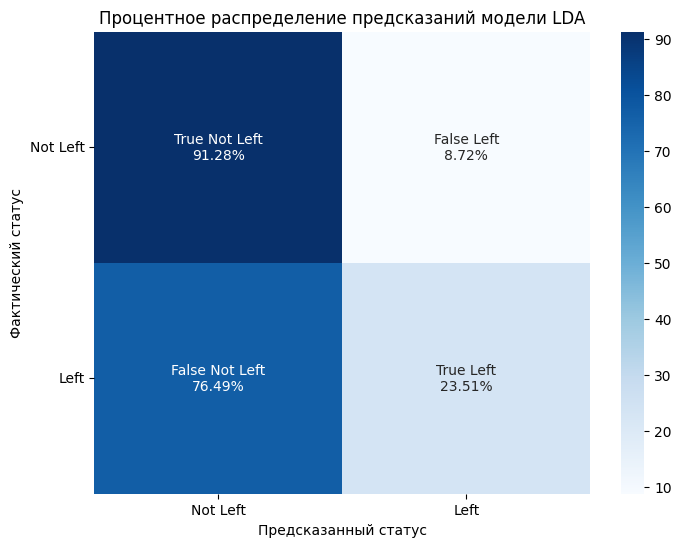

In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Преобразование матрицы ошибок в проценты
cm_percentage = np.array([
    cm[0] / np.sum(cm[0]) * 100,  # Проценты для класса 0
    cm[1] / np.sum(cm[1]) * 100   # Проценты для класса 1
])

# Создание меток для визуализации
group_names = ['True Not Left', 'False Left', 'False Not Left', 'True Left']
group_counts = ["{0:0.2f}%".format(value) for value in cm_percentage.flatten()]
#group_percentages = ["{0:0.2f}%".format(value) for value in cm_percentage.flatten()]

# Метки для каждого блока
#labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

# Создание графика
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=labels, fmt='', cmap='Blues')
plt.title("Процентное распределение предсказаний модели LDA")
plt.ylabel('Фактический статус')
plt.xlabel('Предсказанный статус')
plt.xticks(ticks=[0.5, 1.5], labels=["Not Left", "Left"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Left", "Left"], rotation=0)
plt.show()

